In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dLm = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/main/alllndmark.csv')
dLm=dLm.dropna()
filename=dLm.filename.tolist()
count_nan = dLm.isnull().sum()

# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: right_eye_right_corner_x    0
right_eye_right_corner_y    0
right_eye_center_x          0
right_eye_center_y          0
right_eye_left_corner_x     0
right_eye_left_corner_y     0
left_eye_right_corner_x     0
left_eye_right_corner_y     0
left_eye_center_x           0
left_eye_center_y           0
left_eye_left_corner_x      0
left_eye_left_corner_y      0
filename                    0
dtype: int64


In [ ]:
import glob
from PIL import Image
ii=0
X_data = []
basewidth = 600
#files = glob.glob(r"data2\*.jpg")
for my_file in range(1500):
    strn='/content/drive/MyDrive/Colab Notebooks/main/Allimdata/'+filename[my_file]
    image = Image.open(strn)
    wpercent = (basewidth/float(image.size[0]))
    hsize = int((float(image.size[1])*float(wpercent)))
    img = image.resize((basewidth,hsize),resample=Image.BICUBIC)
    imge = np.array(img)
    print(ii,end=' ')
    ii=ii+1
    #if image is None or image.shape != (hsize, basewidth, 3):
        #print('This image is bad: {my_file} {image.shape if image is not None else "None"}')
    #else:
    X_data.append(imge)

print('X_data shape:', np.array(X_data,dtype=object).shape)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/main/imagefiles', X_data)

In [ ]:
face=np.array(X_data, dtype=object)

In [ ]:
colsToDrop = ['filename']
LMs=dLm.drop(colsToDrop, axis=1)
LMs=LMs.iloc[:1500]
LMs

right_eye_right_corner_x  right_eye_right_corner_y  right_eye_center_x  \
0                          161                       311                 265   
1                          167                       312                 270   
2                          175                       305                 265   
3                          175                       302                 271   
4                          173                       305                 268   
...                        ...                       ...                 ...   
1495                       155                       307                 260   
1496                       159                       299                 251   
1497                       157                       307                 260   
1498                       152                       303                 254   
1499                       163                       304                 253   

      right_eye_center_y  right_eye_left_corner_x  right_eye_left_corner_y  \
0                    261                      364                      277   
1                    261                      357                      273   
2                    252                      357                      277   
3                    255                      362                      276   
4                    256                      356                      276   
...                  ...                      ...                      ...   
1495                 248                      341                      272   
1496                 245                      340                      264   
1497                 246                      350                      271   
1498                 246                      343                      274   
1499                 254                      333                      270   

      left_eye_right_corner_x  left_eye_right_corner_y  left_eye_center_x  \
0                       607.0                    263.0              727.0   
1                       607.0                    263.0              727.0   
2                       619.0                    265.0              735.0   
3                       616.0                    259.0              734.0   
4                       623.0                    261.0              728.0   
...                       ...                      ...                ...   
1495                    620.0                    251.0              710.0   
1496                    619.0                    251.0              714.0   
1497                    604.0                    260.0              719.0   
1498                    614.0                    248.0              721.0   
1499                    613.0                    247.0              718.0   

      left_eye_center_y  left_eye_left_corner_x  left_eye_left_corner_y  
0                 244.0                   809.0                   284.0  
1                 241.0                   810.0                   279.0  
2                 246.0                   812.0                   278.0  
3                 247.0                   813.0                   280.0  
4                 245.0                   810.0                   281.0  
...                 ...                     ...                     ...  
1495              221.0                   811.0                   284.0  
1496              219.0                   803.0                   271.0  
1497              219.0                   810.0                   279.0  
1498              226.0                   807.0                   272.0  
1499              220.0                   811.0                   282.0  

[1500 rows x 12 columns]

In [ ]:
Pface = face
LMs=LMs*wpercent
LMpos=LMs.columns.tolist()
print(LMs.isnull().sum())

right_eye_right_corner_x    0
right_eye_right_corner_y    0
right_eye_center_x          0
right_eye_center_y          0
right_eye_left_corner_x     0
right_eye_left_corner_y     0
left_eye_right_corner_x     0
left_eye_right_corner_y     0
left_eye_center_x           0
left_eye_center_y           0
left_eye_left_corner_x      0
left_eye_left_corner_y      0
dtype: int64


In [ ]:
face=[]

In [ ]:
iselect = list(LMs.index[LMs['right_eye_right_corner_x'].notna() & LMs['right_eye_right_corner_y'].notna() &
                   LMs['right_eye_center_x'].notna() & LMs['right_eye_center_y'].notna()])

In [ ]:
m=len(iselect)
m

1500

In [ ]:
Spic=Pface.shape[1]
m=len(iselect)
X=np.zeros((m,Spic,600,3),dtype='uint8')
Y=np.zeros((m,12))

X[:,:,:,:]=Pface
Y[:,0]=LMs.right_eye_right_corner_x
Y[:,1]=LMs.right_eye_right_corner_y
Y[:,2]=LMs.right_eye_center_x
Y[:,3]=LMs.right_eye_center_y
Y[:,4]=LMs.right_eye_left_corner_x
Y[:,5]=LMs.right_eye_left_corner_y
Y[:,6]=LMs.left_eye_right_corner_x
Y[:,7]=LMs.left_eye_right_corner_y
Y[:,8]=LMs.left_eye_center_x
Y[:,9]=LMs.left_eye_center_y
Y[:,10]=LMs.left_eye_left_corner_x
Y[:,11]=LMs.left_eye_left_corner_y
print('# selected images = %d' %(m))

# selected images = 1500


In [ ]:
Pface=[]

In [ ]:
ny=Y.max()
Y=Y/ny
ny

533.125

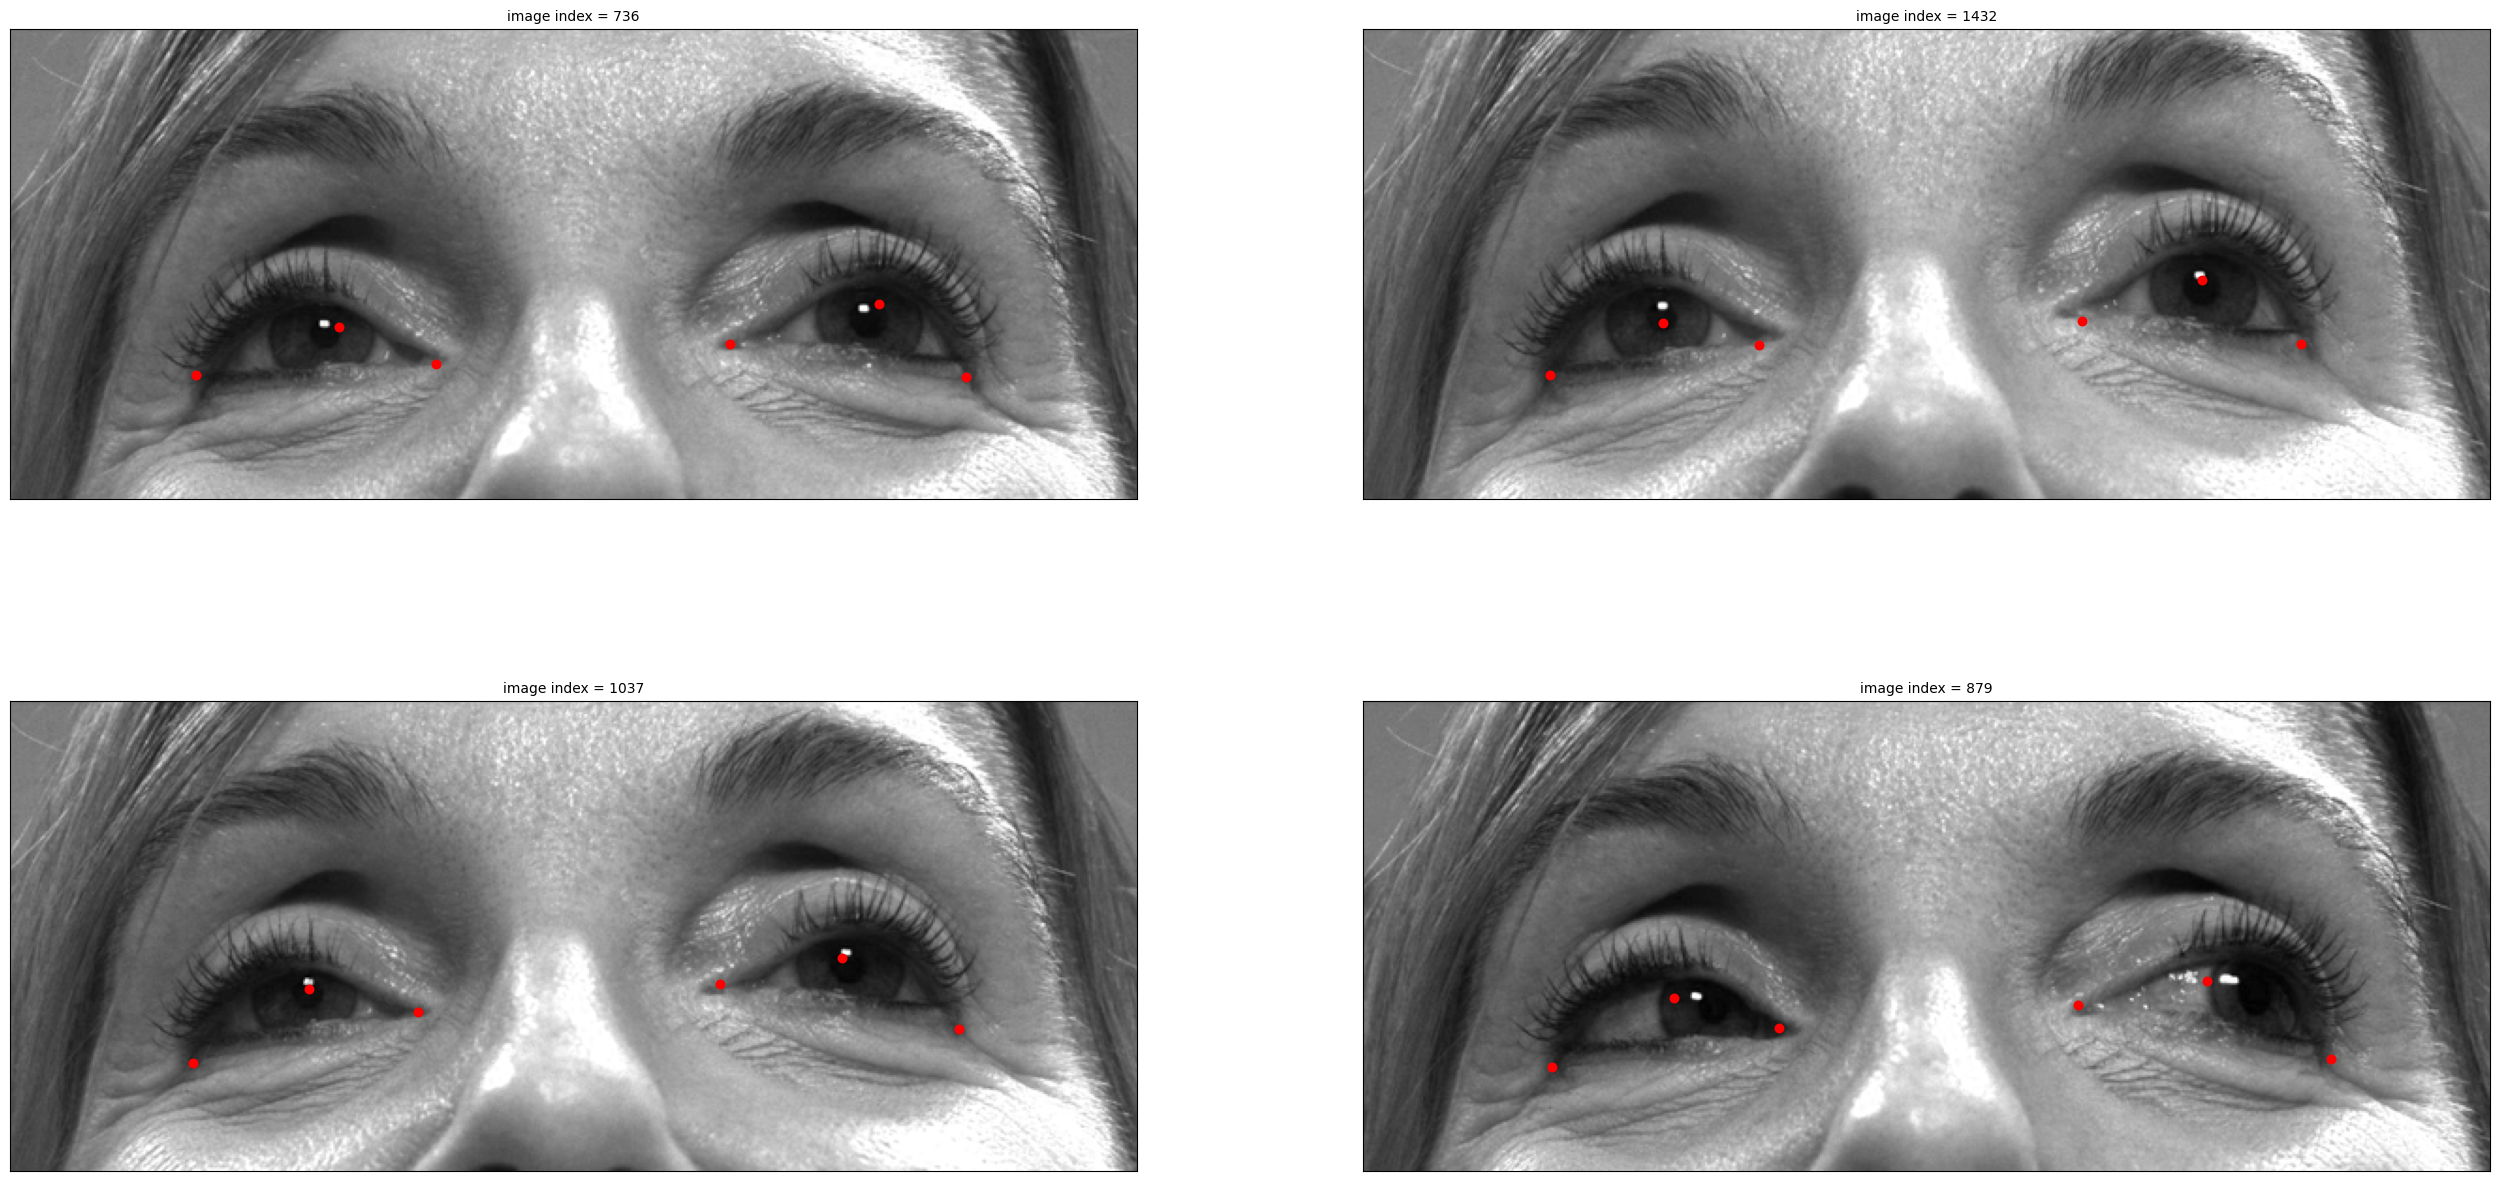

In [ ]:
import matplotlib.pyplot as plt

n = 0
nrows = 2
ncols = 2
irand=np.random.choice(Y.shape[0],nrows*ncols)
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=[ncols*16,nrows*8])
for row in range(nrows):
    for col in range(ncols):
        ax[row,col].imshow(X[irand[n],:,:,0], cmap='gray')
        ax[row,col].scatter(Y[irand[n],0::2]*ny,Y[irand[n],1::2]*ny,marker='.',c='r',s=150)
        ax[row,col].set_xticks(())
        ax[row,col].set_yticks(())
        ax[row,col].set_title('image index = %d' %(irand[n]),fontsize=10)
        n += 1

In [ ]:
from sklearn.model_selection import train_test_split

random_seed=21
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=random_seed)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', activation='tanh', input_shape=(Spic, 600, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])
model.summary()
history=model.fit(Xtrain, Ytrain, batch_size=16, epochs=30, validation_data = (Xtest, Ytest), verbose = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 600, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 300, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 125, 300, 32)      0         
                                                                 
 flatten (Flatten)           (None, 1200000)           0         
                                                                 
 dense (Dense)               (None, 256)               307200256 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
66/66 [==============================] - 18s 145ms/step - loss: 0.0483 - accuracy: 0.9829 - val_loss: 0.0262 - val_accuracy: 1.0000
Epoch 2/30
66/66 [==============================] - 9s 134ms/step - loss: 0.0338 - accuracy: 0.9981 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 3/30
66/66 [==============================] - 9s 129ms/step - loss: 0.0246 - accuracy: 0.9981 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 4/30
66/66 [==============================] - 9s 131ms/step - loss: 0.0171 - accuracy: 0.9981 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 5/30
66/66 [==============================] - 9s 132ms/step - loss: 0.0106 - accuracy: 0.9981 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 6/30
66/66 [==============================] - 9s 130ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/30
66/66 [==============================] - 9s 130ms/step - loss: 0.0040 - accuracy: 0.9981 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]

    if len(loss_list) == 0:
        print('Loss is missing in history')
        return

    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)

    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))

    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

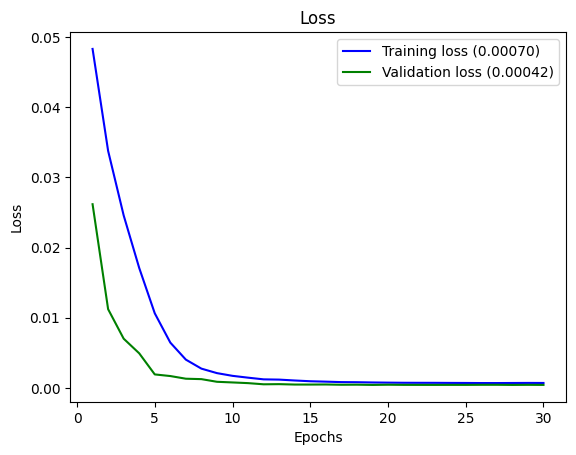

In [ ]:
plot_history(history)

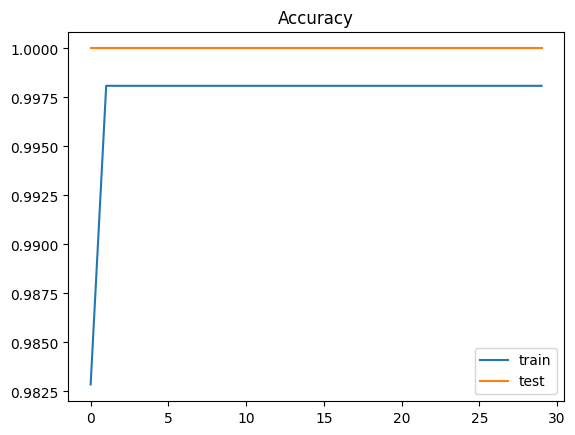

In [ ]:
from matplotlib import pyplot
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
Ytest_pred = model.predict(Xtest)

15/15 [==============================] - 0s 31ms/step


Text(0.5, 0.98, 'red: orignal; blue: CNN')

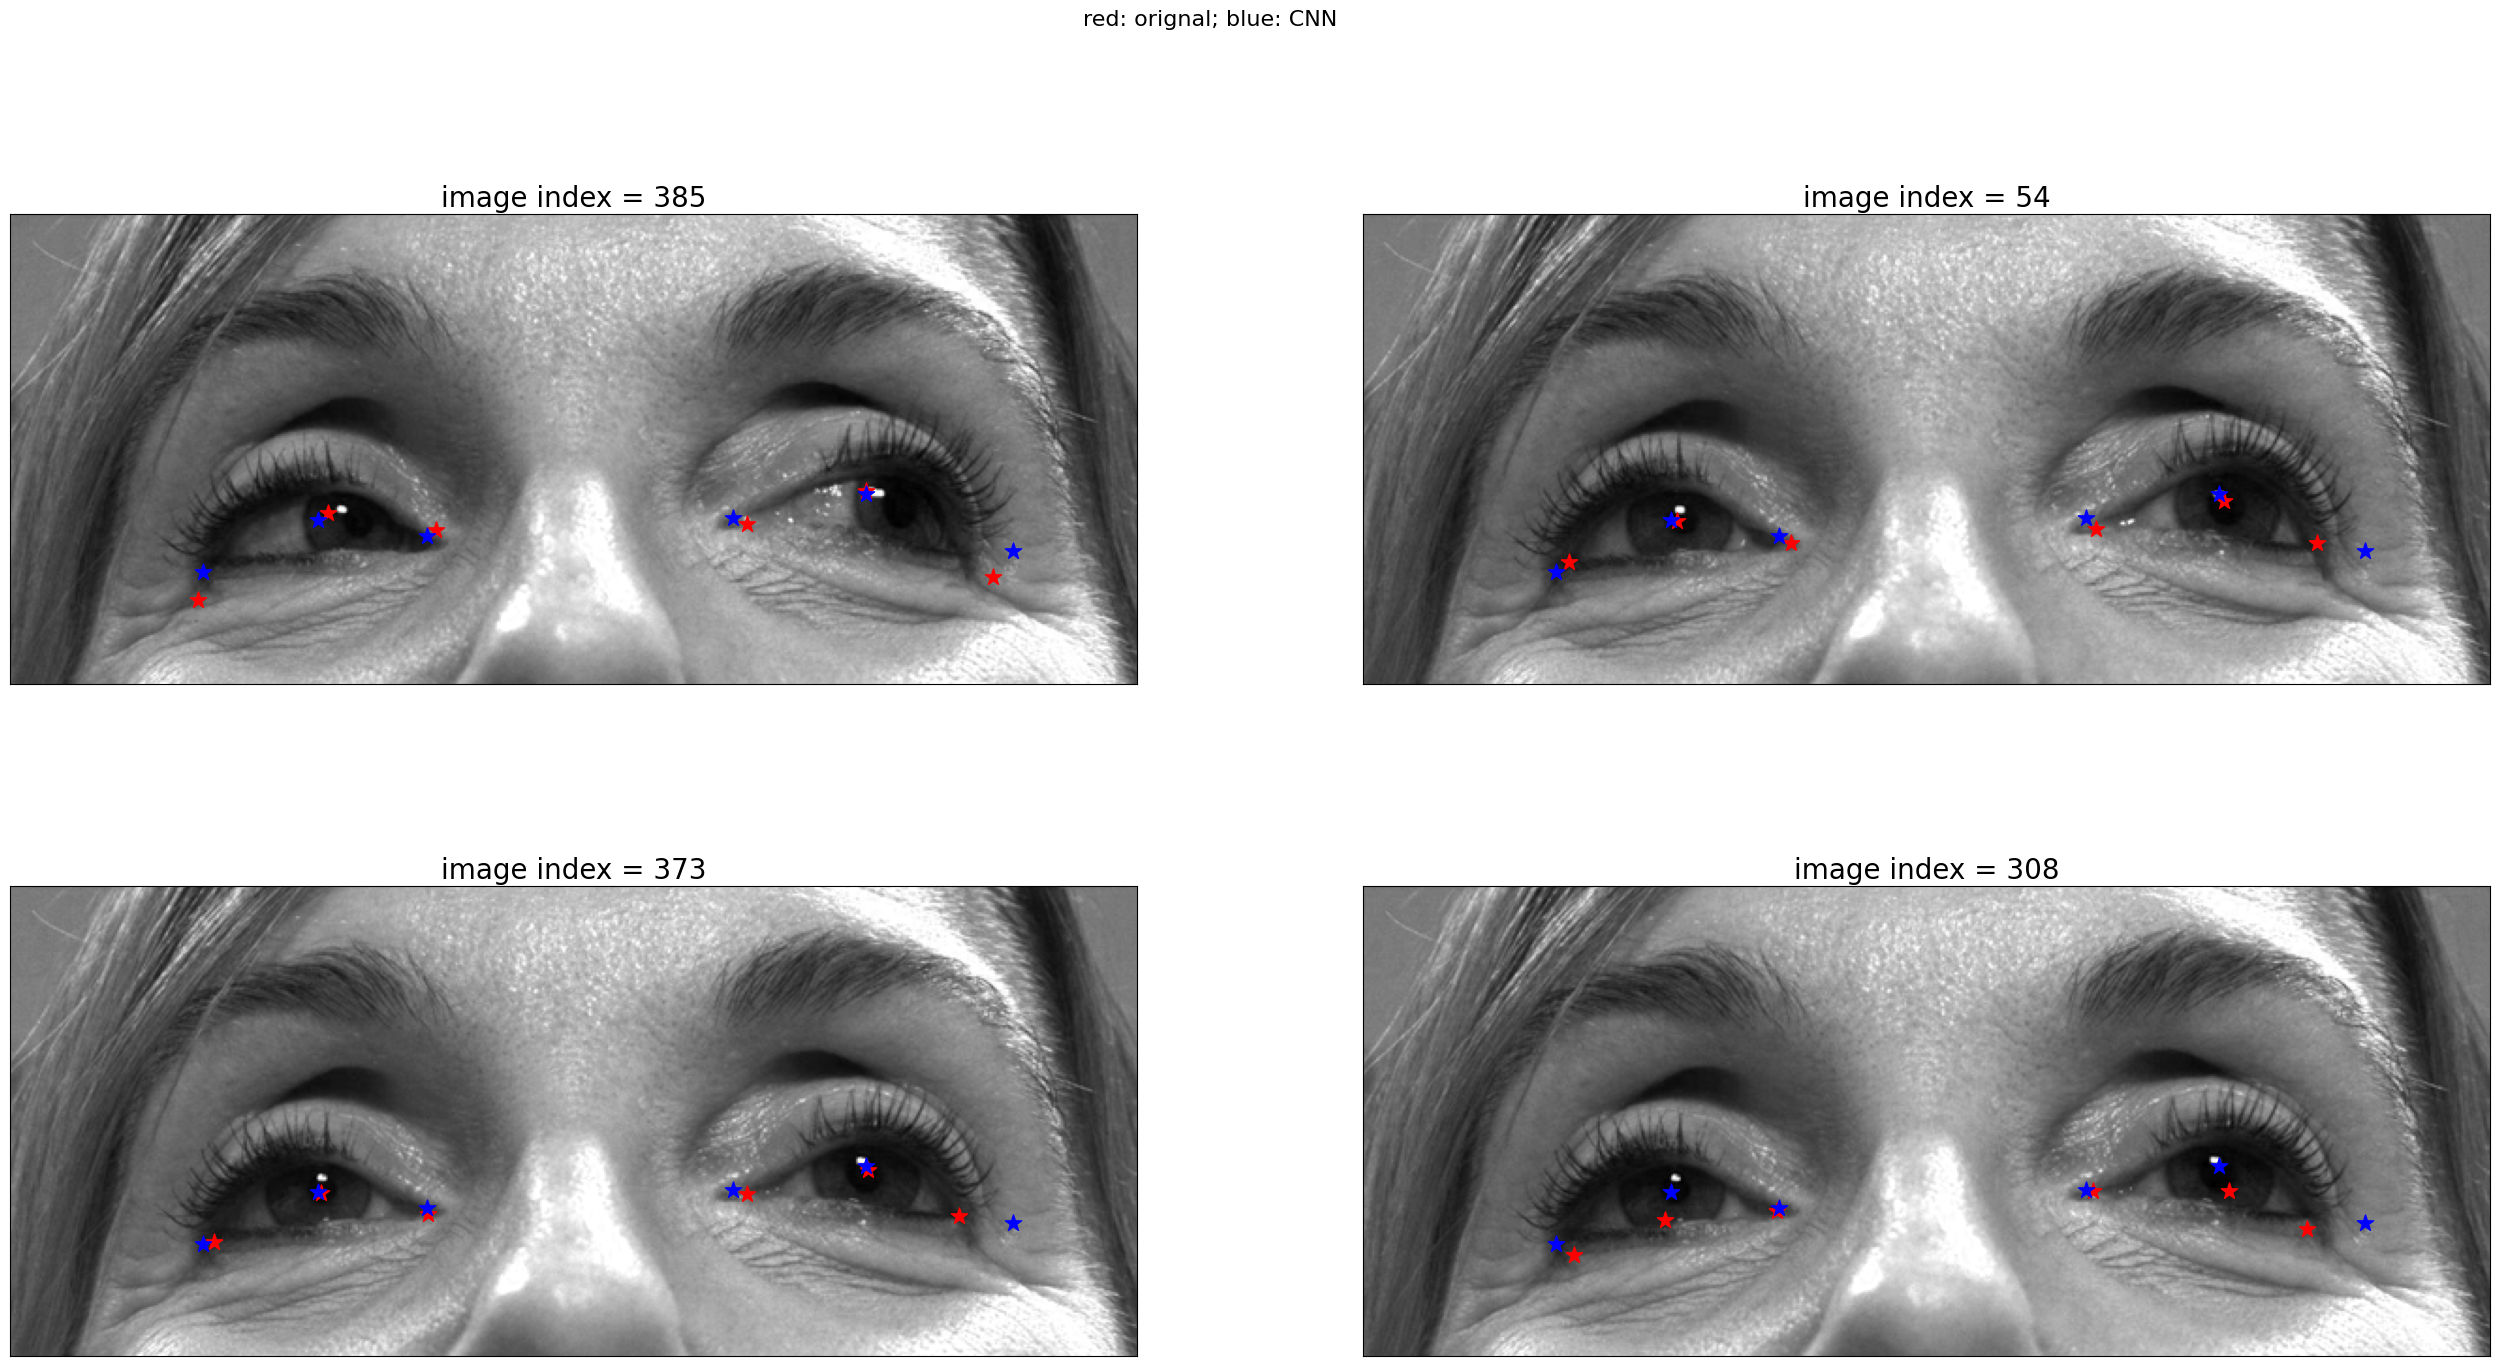

In [ ]:
n = 0
nrows = 2
ncols = 2
irand=np.random.choice(Ytest.shape[0],nrows*ncols)
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=[ncols*16,nrows*8])
for row in range(nrows):
    for col in range(ncols):
        ax[row,col].imshow(Xtest[irand[n],:,:,0], cmap='gray')
        ax[row,col].scatter(Ytest[irand[n],0::2]*ny,Ytest[irand[n],1::2]*ny,marker='*',c='r',s=150)
        ax[row,col].scatter(Ytest_pred[irand[n],0::2]*ny,Ytest_pred[irand[n],1::2]*ny,marker='*',c='b',s=150)
        ax[row,col].set_xticks(())
        ax[row,col].set_yticks(())
        ax[row,col].set_title('image index = %d' %(irand[n]),fontsize=20)
        n += 1
plt.suptitle('red: orignal; blue: CNN', fontsize=16)

In [ ]:
ii=1
import glob
basewidth = 600
Xtest1_data = []
for img in glob.glob("/content/drive/MyDrive/Colab Notebooks/main/testing image/*.jpg"):
    image = Image.open(img)
    wpercent = (basewidth/float(image.size[0]))
    hsize = int((float(image.size[1])*float(wpercent)))
    img = image.resize((basewidth,hsize),resample=Image.BICUBIC)
    imge = np.array(img)
    print(ii,end=' ')
    ii=ii+1
    #if image is None or image.shape != (hsize, basewidth, 3):
        #print('This image is bad: {my_file} {image.shape if image is not None else "None"}')
    #else:
    Xtest1_data.append(imge)
print('X_teset shape:', np.array(Xtest1_data,dtype=object).shape)

1 2 3 4 5 X_teset shape: (5, 250, 600, 3)


In [ ]:
test=np.array(Xtest1_data, dtype=object)
X_testing=np.zeros((5,Spic,600,3),dtype='uint8')

X_testing[:,:,:,:]=test

In [ ]:
Ytest_pred = model.predict(X_testing)

1/1 [==============================] - 0s 145ms/step


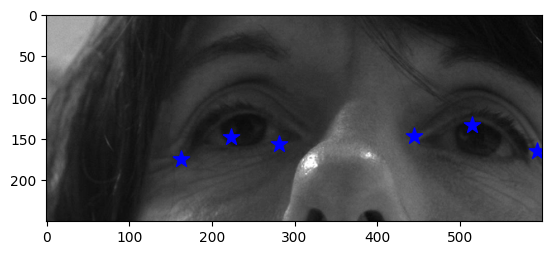

In [ ]:
from pylab import *
imshow(X_testing[0,:,:,0], cmap='gray')
scatter(Ytest_pred[0,0::2]*ny+60,Ytest_pred[0,1::2]*ny-15,marker='*',c='b',s=150)

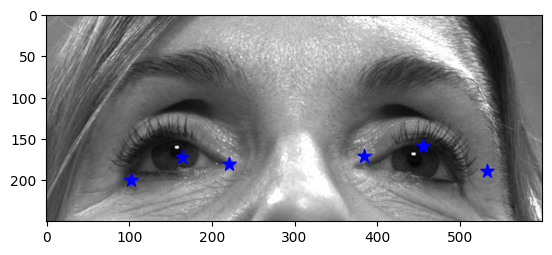

In [ ]:
from pylab import *
imshow(X_testing[2,:,:,0], cmap='gray')
scatter(Ytest_pred[2,0::2]*ny,Ytest_pred[0,1::2]*ny+10,marker='*',c='b',s=100)

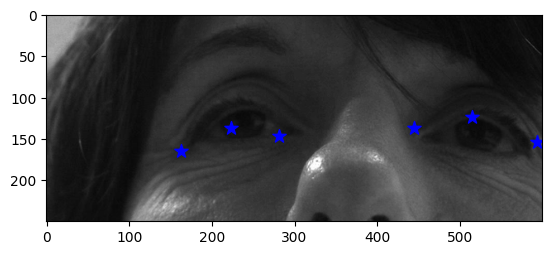

In [ ]:
from pylab import *
imshow(X_testing[3,:,:,0], cmap='gray')
scatter(Ytest_pred[3,0::2]*ny+60,Ytest_pred[0,1::2]*ny-25,marker='*',c='b',s=100)

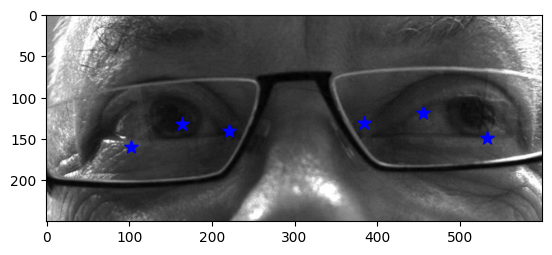

In [ ]:
from pylab import *
imshow(X_testing[4,:,:,0], cmap='gray')
scatter(Ytest_pred[4,0::2]*ny,Ytest_pred[0,1::2]*ny-30,marker='*',c='b',s=100)